# Wine Classifier
In this notebook I will be creating a SVM classifier to classify wines by their quality. Using a Red Wine Quality Dataset acquired from Kaggle. The dataset contains 12 attributes of the wines.

## 1. Import Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for statistical data visualization
%matplotlib inline

## 2. Import Dataset
This analysis uses the Red Wine Quality dataset from Kaggle

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 

In [67]:
wine_data = pd.read_csv("winequality-red.csv")

## 3. Exploratory Data Analysis
Let's first use the df.shape and df.info() functions to see the dimensions of the dataset and what types of variables we have. 

#### 3a Initial observations

In [68]:
wine_data.shape

(1599, 12)

In [69]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [70]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This dataset has 12 variables and 1599 observations. 11 of the variables are continuous and 1 variable is discrete. The discrete variable is quality, which is the target variable. In addition, there are no missing values in the dataset.

In [71]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3b Create Target Variable
Currently, the quality variable is a discrete variable that ranges from 0 to 10. In order to create a SVM classifier I need a binary target variable, so I will rename quality to "rating" (which will still range from 0-10). Then I will create a new variable called "wine quality". Wines with a rating of 7 of higher will be considered "good" quality wine and wines with a rating below 7 will be considered "poor" quality wines. Assign "good" wines a value of 1 and "poor" wines a value of 0. 

Start by renaming the quality column.

In [72]:
# Rename "quality" to "rating"
wine_data = wine_data.rename(columns = {'quality':'rating'})
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'rating'],
      dtype='object')

Create new column "wine quality" where wine quality is "good" when rating is >= 7 and wine quality is "poor" otherwise

In [73]:
# First create a method categorize() which determines the quality of a wine based on the value in the rating column
def categorize(row): 
    if row['rating'] >= 7: 
        return 1
    else: 
        return 0

# Next, pass the categorize function into apply() to create the new "wine quality" column
wine_data["wine quality"] = wine_data.apply(lambda row: categorize(row), axis = 1)

Now lets take a look at the first 10 rows of the dataset with the added target variable, "wine quality".

In [74]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating,wine quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


Now that I have added a column for wine quality lets see how many wines have a good rating versus a poor rating. In other words, lets look at the distribution of the target variable, wine quality.

In [75]:
wine_data["wine quality"].value_counts()

0    1382
1     217
Name: wine quality, dtype: int64

Percentage distribution of good and poor wines.

In [76]:
wine_data["wine quality"].value_counts()/float(len(wine_data))

0    0.86429
1    0.13571
Name: wine quality, dtype: float64

### 3c Outliers
Investigate if there are any potential outliers present.
First look at the summary statistics for the continuous variables.

In [77]:
round(wine_data.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating,wine quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64,0.14
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81,0.34
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00,0.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00,0.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00,0.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00,1.00


As you can see from above, the actual range of wine ratings is 3 - 8, so no wines were rated less than 3 or greater than 8. This is something to keep in mind when interpreting the results of the classifier that will be built.

Next, create boxplots for the variables to see if there are any visible outliers.

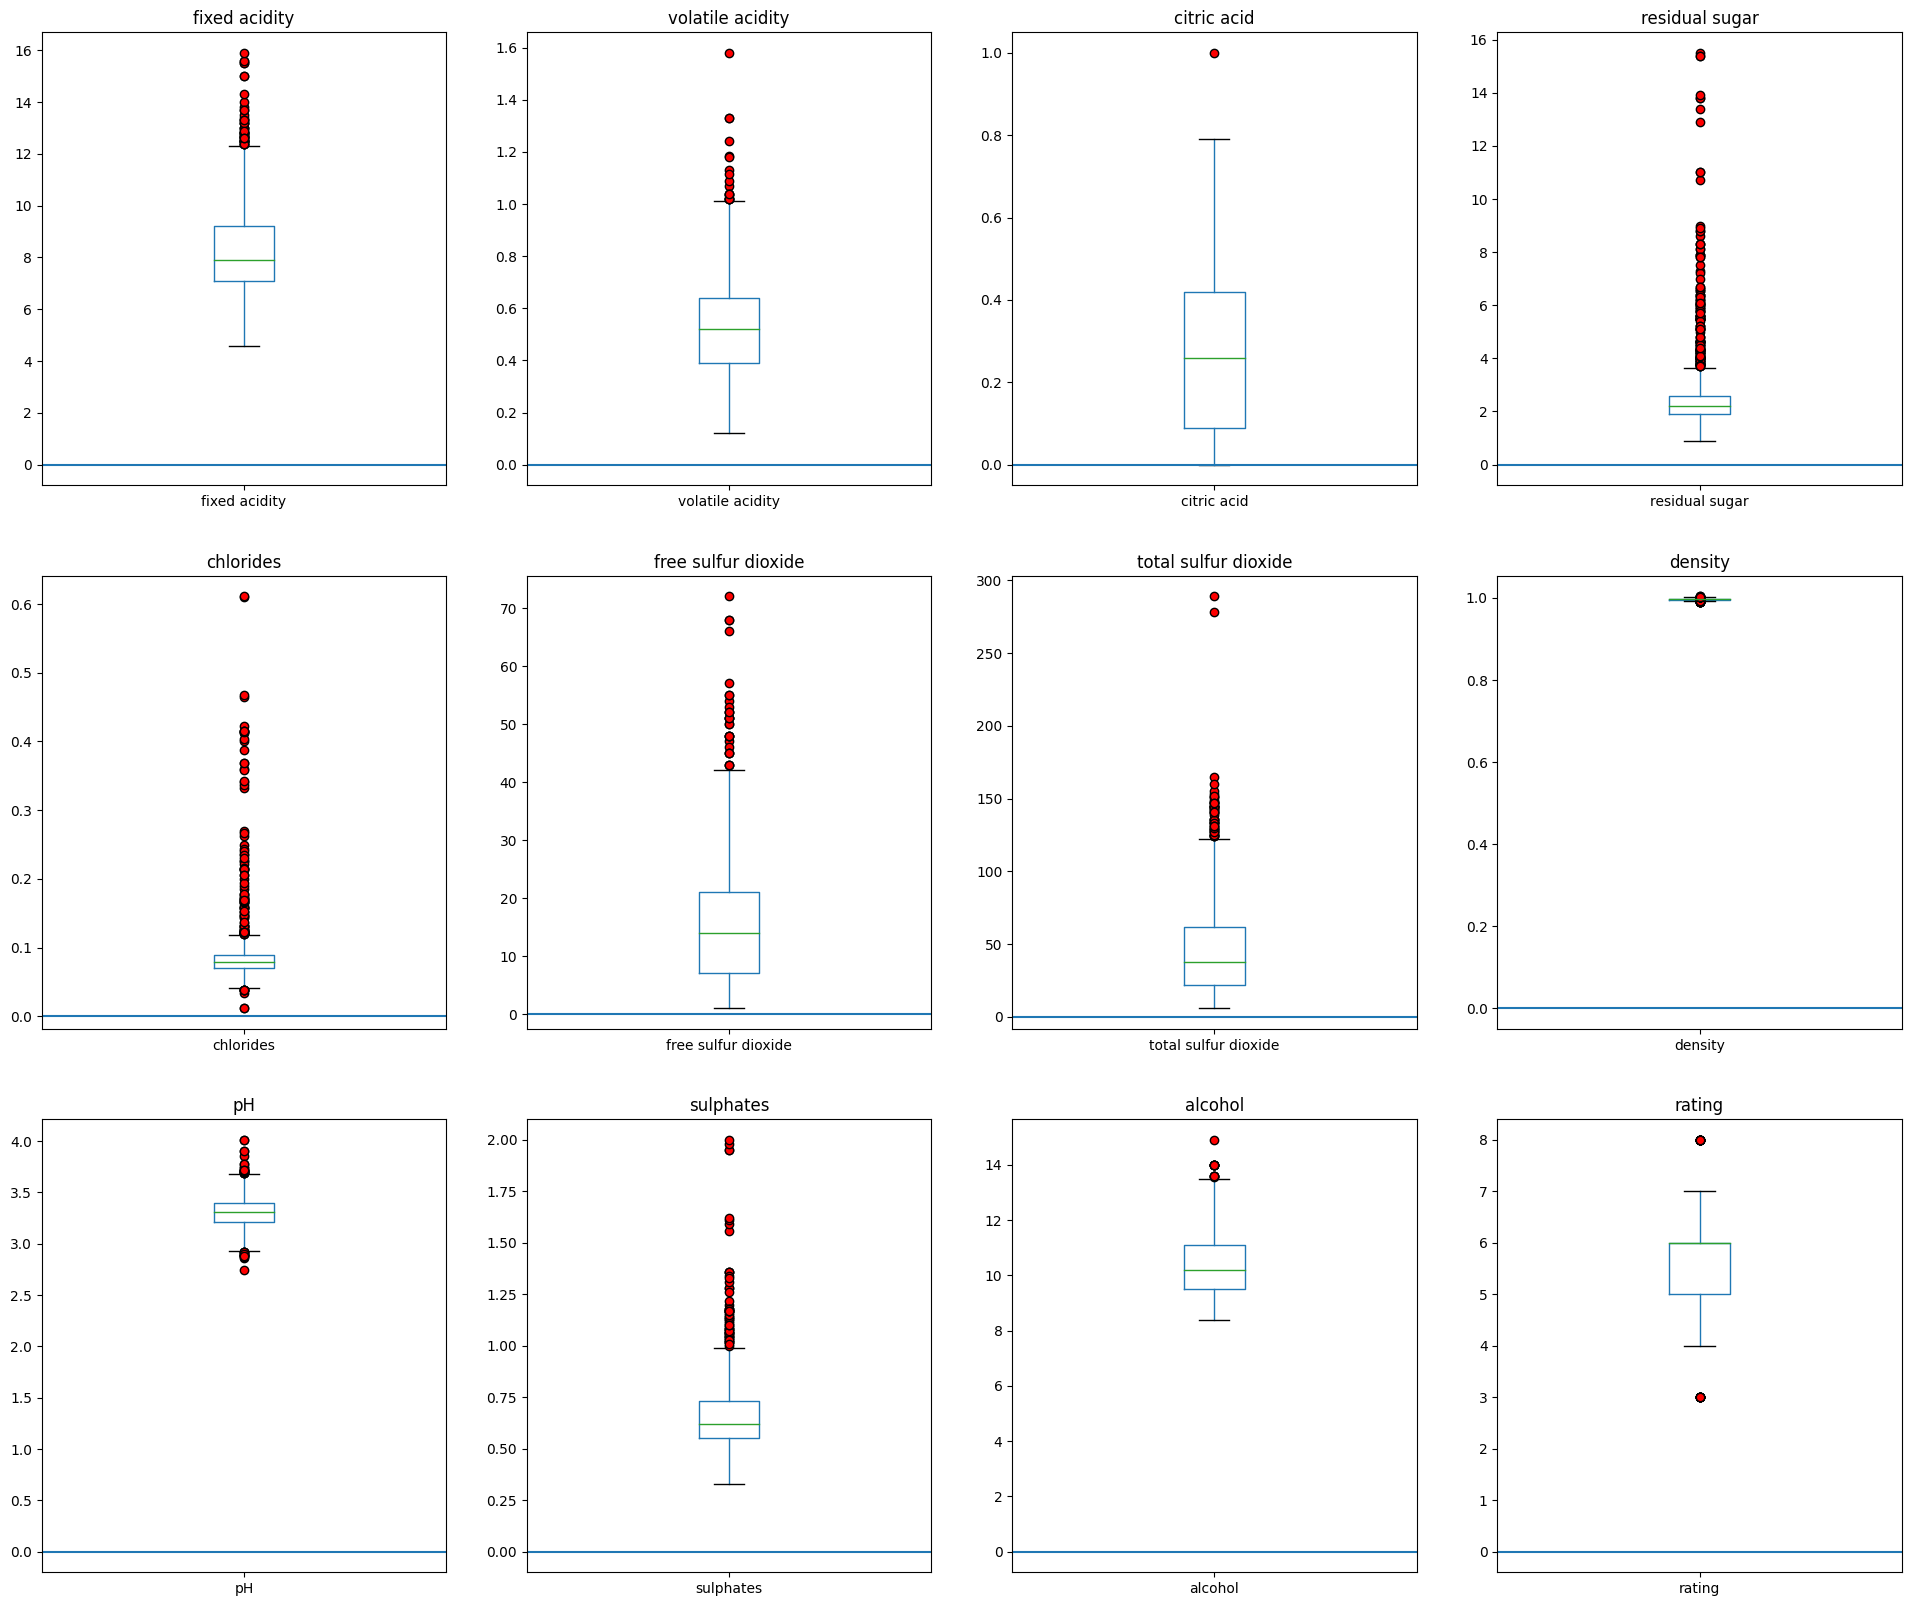

In [78]:
# Define outliers to be red_circle (this is to make all outliers stand out in red)
red_circle = dict(markerfacecolor='red', marker='o')

# Create a figure to contain plots of the 11 explanatory variables 
plt.figure(figsize=(24,20))

# loop through all variables and create a boxplot for each
for i in range(0,12):
    plt.subplot(3, 4, i+1)
    fig = wine_data.boxplot(column=wine_data.columns[i], flierprops=red_circle)
    fig.set_title(wine_data.columns[i])
    plt.grid(False)
    plt.axhline()


From the boxplots, there appears to be a significant amount of outliers in these variables, most notably in residual sugar, chloride, and sulphates. 

After looking at the summary statistics and boxplot for rating, I am curious to see what the distribution of this varaible looks like. I am using the binary classifier "wine quality" which is derived from rating so this will indirectly effect the relationship between the explanatory variables and the target variable. 

Text(0, 0.5, 'Count of wines')

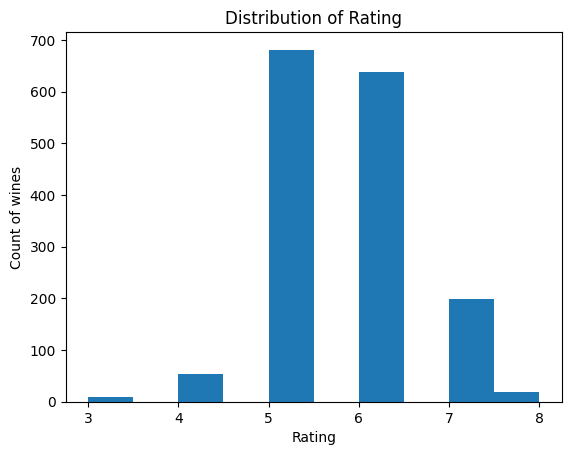

In [79]:
fig, ax = plt.subplots()
ax.hist(wine_data["rating"], align = "mid")
ax.set_title("Distribution of Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Count of wines")

## wine_data["rating"].value_counts()

Text(0, 0.5, 'Count of wines')

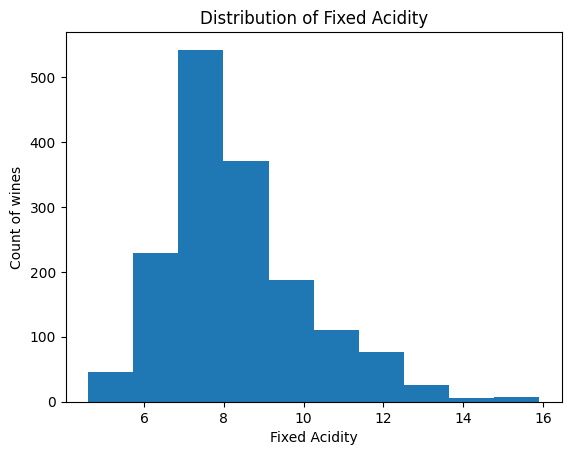

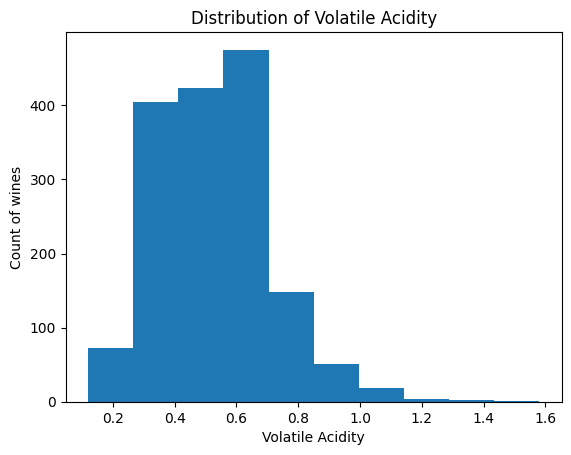

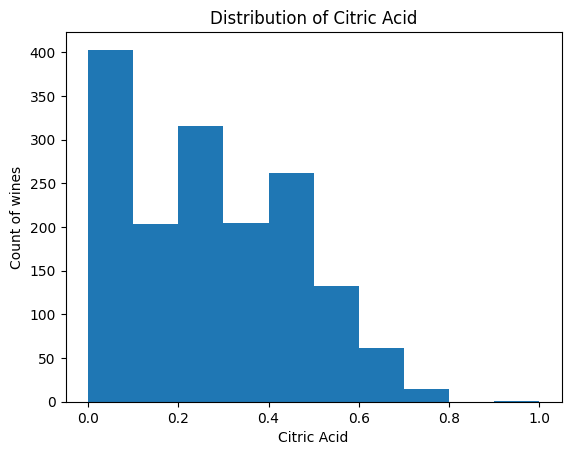

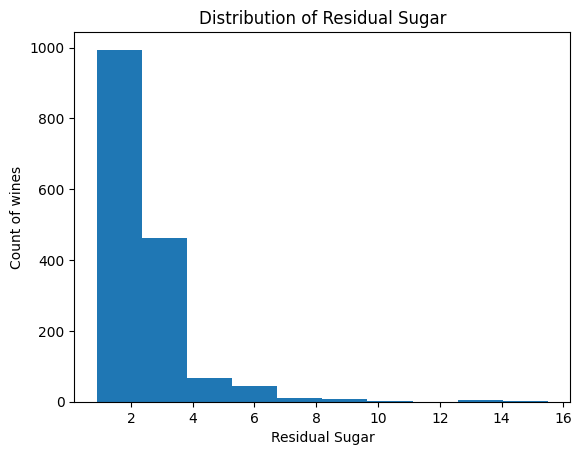

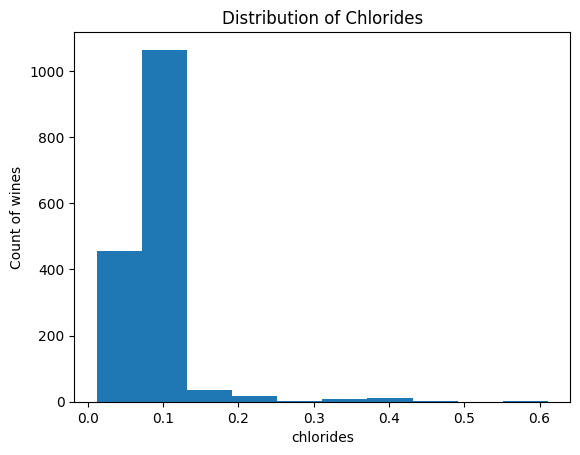

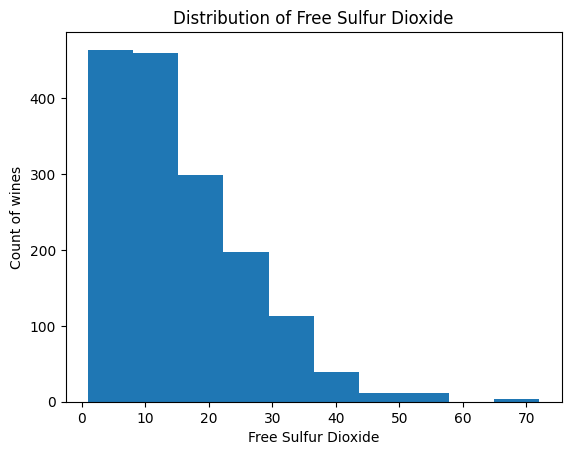

In [80]:
fig, ax = plt.subplots()
ax.hist(wine_data["fixed acidity"], align = "mid")
ax.set_title("Distribution of Fixed Acidity")
ax.set_xlabel("Fixed Acidity")
ax.set_ylabel("Count of wines")

fig, ax = plt.subplots()
ax.hist(wine_data["volatile acidity"], align = "mid")
ax.set_title("Distribution of Volatile Acidity")
ax.set_xlabel("Volatile Acidity")
ax.set_ylabel("Count of wines")

fig, ax = plt.subplots()
ax.hist(wine_data["citric acid"], align = "mid")
ax.set_title("Distribution of Citric Acid")
ax.set_xlabel("Citric Acid")
ax.set_ylabel("Count of wines")

fig, ax = plt.subplots()
ax.hist(wine_data["residual sugar"], align = "mid")
ax.set_title("Distribution of Residual Sugar")
ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Count of wines")

fig, ax = plt.subplots()
ax.hist(wine_data["chlorides"], align = "mid")
ax.set_title("Distribution of Chlorides")
ax.set_xlabel("chlorides")
ax.set_ylabel("Count of wines")

fig, ax = plt.subplots()
ax.hist(wine_data["free sulfur dioxide"], align = "mid")
ax.set_title("Distribution of Free Sulfur Dioxide")
ax.set_xlabel("Free Sulfur Dioxide")
ax.set_ylabel("Count of wines")

It looks like most of the wines in the dataset are rated either 5 or 6.

## 4. SVM Classifier
First, split the data into the feature vector and target variable.

In [81]:
X = wine_data.drop(["wine quality"], axis = 1)
y = wine_data["wine quality"]

### 4a. Split Data into Training and Testing Datasets

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
X_train.shape, X_test.shape

((1279, 12), (320, 12))

In [84]:
y_train.shape, y_test.shape

((1279,), (320,))

Now that the data has been broken down into training and test data, we are ready to create the SVM classifier. First, the variables may need to be scaled to avoid over or under-weighting variables with larger or smaller values.

### 4b Feature Scaling
**Use StandardScaler to scale variables**

In this step, I will scale and standardize the data. Scaling means to change the range of the values while keeping the distribution the same. Standardizing means transforming the data so that the standard deviation is equal to one. 


Currently, the ranges of the attributes varies greatly. Some attributes have very large values (that range from 0 to 300), while others have very small values (that range from 0 to 1). As a result, the attributes with larger values would be weighted more heavily in the SVM model. That's just the way the algorithm works. It doesn't know what the values represent, just that some are larger than others and those will be given more weight. To minimize this effect, we use feature scaling to bring all attributes to the same scale and thus the same level of importance.

**Note:** Not all of the attributes can be accurately represented by normal distributions so the StandardScaler may not be the best scaling method to use.

#### <span style='color:Red'> Sidebar: </span> Fit_transform vs. transform
Here, I just want to clarify the difference between fit_transform and transform and why we use the former on the training data and the latter on the test data. 

Fit_transform calculates the mean and variance of each attribute (fit) and then transforms all attributes using their respective means and varainces (transform). It uses the formula below. 

$$X_{scaled} = \frac{x - \mu}{\sigma}$$ 

We also want to scale the test data, but we don't want this to create a bias in our model. Thus, we use the transform() method to transform the test data using the same mean and variance from the training data. So, the paramaters learned from the training data will be used to transform both the training data and the test data. 

In [85]:
cols = X_train.columns

# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Create the scaler called "scaler"
scaler = StandardScaler()

# fit the transformer to the training data and then transform it
X_train = scaler.fit_transform(X_train)

# Standardize the testing data
X_test = scaler.transform(X_test)

Next, convert X_train and X_test into dataframes.

In [86]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [87]:
# Lets see what the X_train dataset looks like after scaling
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-3.583269e-16,4.555473e-16,-9.166501e-17,-1.666637e-17,1.111091e-17,-8.888729e-17,-6.666546e-17,-6.292456e-14,3.405494e-15,-2.777728e-16,5.916560e-16,-3.298552e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.097363e+00,-2.246915e+00,-1.392011e+00,-1.138559e+00,-1.570125e+00,-1.429408e+00,-1.224690e+00,-3.553912e+00,-3.702404e+00,-1.653976e+00,-1.898397e+00,-3.230824e+00
25%,-7.134876e-01,-7.672394e-01,-9.317263e-01,-4.498451e-01,-3.562873e-01,-7.638080e-01,-7.480890e-01,-6.044792e-01,-6.486230e-01,-6.240939e-01,-8.615341e-01,-7.893327e-01
50%,-2.521957e-01,-5.480282e-02,-6.229902e-02,-2.432309e-01,-1.679332e-01,-1.932938e-01,-2.714882e-01,1.350388e-03,1.117615e-03,-2.235841e-01,-2.017125e-01,4.314128e-01
75%,5.550651e-01,5.891303e-01,7.559855e-01,3.225488e-02,6.227746e-02,4.723060e-01,4.732005e-01,5.832656e-01,5.858842e-01,4.057886e-01,6.309196e-01,4.314128e-01
max,4.360723e+00,5.754296e+00,3.722267e+00,8.916670e+00,1.096589e+01,5.321677e+00,7.205186e+00,3.684156e+00,4.549302e+00,7.672182e+00,4.228518e+00,2.872904e+00


## 5 Create SVM Classifier
### 5a SVM with Default Parameters

In [88]:
# Import svm to use SVC classifier
from sklearn import svm

# Import metrics to compute
from sklearn import metrics

# Create classifier with default parameters
clf = svm.SVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the accuracy score of the model
#print("Model accuracy of SVM with default parameters: {0:0.4f}". format(metrics.accuracy_score(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [90]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating,wine quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485
